# Insurance Prediction

---



**1.  Project Objective**

The objective of this project is to predict medical insurance costs (**charges**) for individuals based on their personal and medical attributes using supervised Machine Learning regression models.

**2.  Dataset Description**

The dataset contains the following features:

age – Age of the insured person

sex – Gender

bmi – Body Mass Index

children – Number of dependents

smoker – Smoking status

region – Geographic region

charges – Medical insurance cost (target variable)

📌 Problem type: Regression

📌 Target variable: charges

**3. Get the Data**

This cell defines a function that downloads the insurance dataset if it is not already available and then loads it into a Pandas DataFrame for further analysis.

In [1]:
from pathlib import Path
import pandas as pd
import urllib.request

def load_insurance_data():
    data_path = Path("datasets/insurance")
    csv_path = data_path / "insurance.csv"

    if not csv_path.is_file():
        data_path.mkdir(parents=True, exist_ok=True)
        url = "https://raw.githubusercontent.com/joedetDS/medical-insurance-cost-prediction/main/insurance.csv"
        urllib.request.urlretrieve(url, csv_path)

    return pd.read_csv(csv_path)


ModuleNotFoundError: No module named 'pandas'

Take a Quick Look at the Data Structure

In [ ]:
insurance = load_insurance_data()
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Display the dimensions (number of rows and columns) of the insurance dataset.

In [ ]:
insurance.shape

(1338, 7)

Show a summary of the insurance dataset, including column names, data types, and non-null counts.

In [ ]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Count and shows the frequency of each category in a non-numeric column of the dataset.

In [ ]:
insurance["sex"].value_counts()

,count
sex,
male,676
female,662


In [ ]:
insurance["smoker"].value_counts()

,count
smoker,
no,1064
yes,274


In [ ]:
insurance["region"].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


Provide statistical summaries (like mean, median, min, max, and quartiles) for all numeric columns in the insurance dataset.

In [ ]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Plot a histogram shows the
number of instances (on the vertical a is) that have a given value range (on
the horizontal a is).

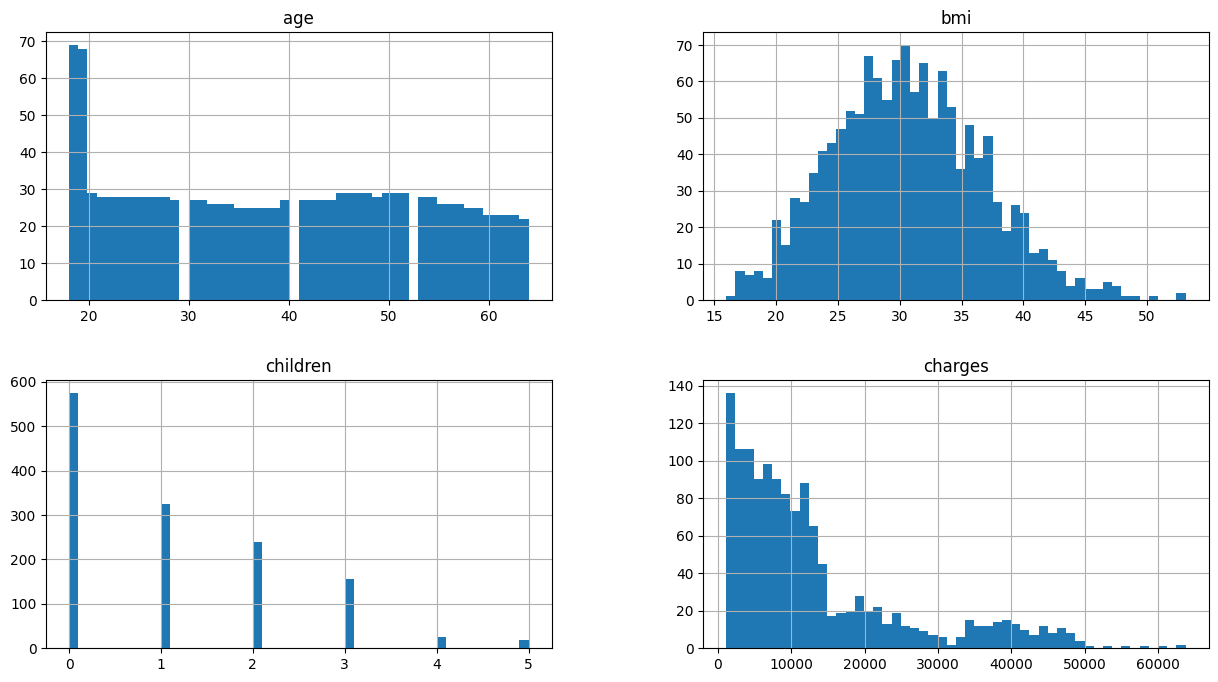

In [ ]:
import matplotlib.pyplot as plt
insurance.hist(bins=50, figsize=( 15, 8))
plt.show()


**4. Create a Test Set**

Split the insurance dataset into training and test sets (80% train, 20% test) while preserving the proportion of smoker categories in both sets (stratified sampling).

In [ ]:
from sklearn.model_selection import train_test_split

strat_train_set, strat_test_set = train_test_split(
    insurance,
    test_size=0.2,
    stratify=insurance["smoker"],  # stratification on smoker
    random_state=42
)

**Method Choice – Stratified Sampling**

Stratified sampling is performed based on the `smoker` column because it is considered a **highly informative feature** for predicting insurance charges.

To avoid introducing bias, we preserve the original proportion of smokers and non-smokers in both the training and test sets.  
This ensures that the data split remains representative of the original dataset and improves model reliability.


Checks and compares the proportion of smoker categories in the full dataset, training set, and test set to ensure stratified sampling preserved the original distribution.

In [ ]:
print("Proportion in the entire dataset :")
print(insurance["smoker"].value_counts(normalize=True))

print("\nProportion in the  train set :")
print(strat_train_set["smoker"].value_counts(normalize=True))

print("\nProportion in the test set :")
print(strat_test_set["smoker"].value_counts(normalize=True))

Proportion in the entire dataset :
smoker
no     0.795217
yes    0.204783
Name: proportion, dtype: float64

Proportion in the  train set :
smoker
no     0.795327
yes    0.204673
Name: proportion, dtype: float64

Proportion in the test set :
smoker
no     0.794776
yes    0.205224
Name: proportion, dtype: float64


**5. Explore and Visualize the Data to Gain Insights**

Create a copy of the training set to safely perform data preprocessing and analysis without modifying the original dataset.

In [ ]:
insurance_train = strat_train_set.copy()

Perform exploratory data analysis (EDA) by visualizing relationships between features and the target (charges):

-> Identifie numeric and categorical columns.

-> Create scatter plots for numeric features against charges.

-> Create boxplots for categorical features against charges.

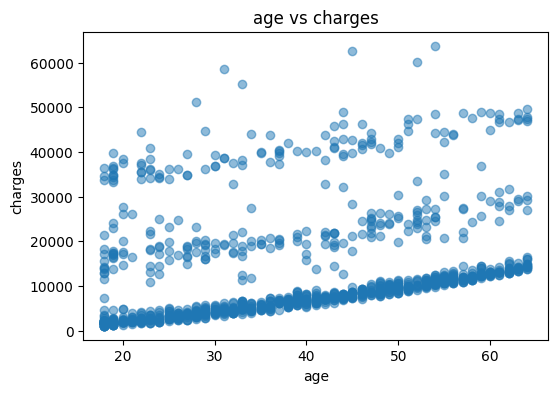

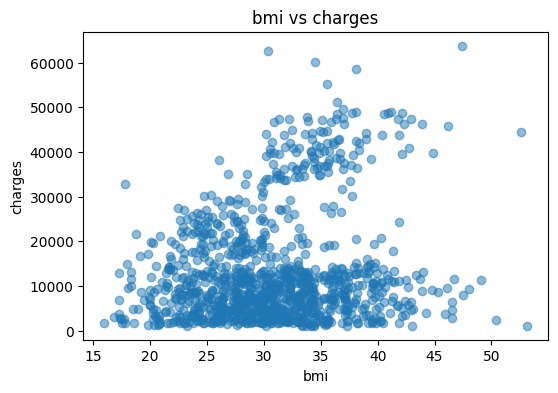

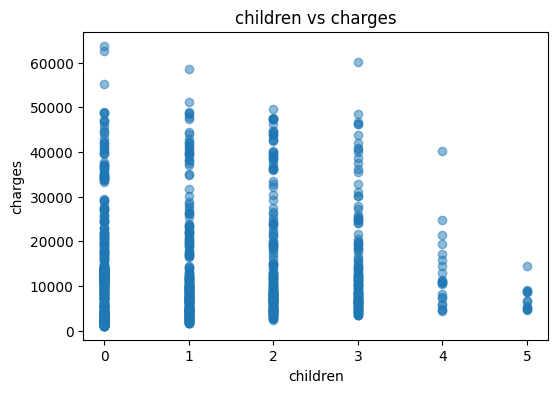

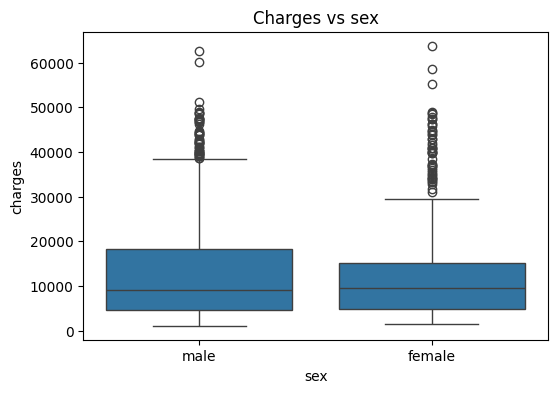

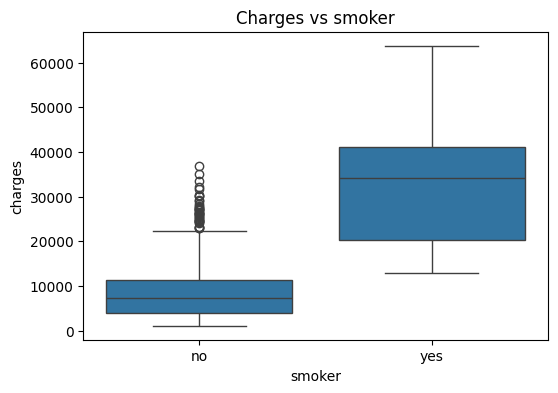

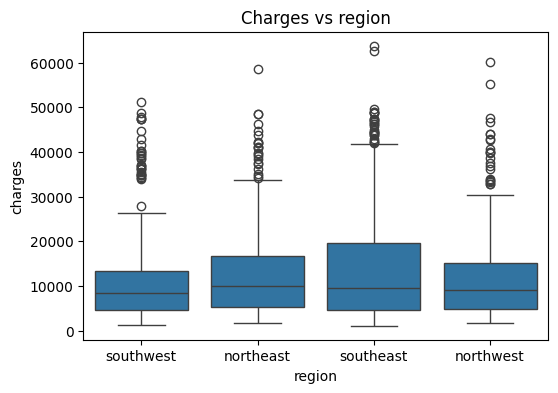

In [ ]:
import seaborn as sns

# 1️⃣ Identify numeric and categorical columns
numerical_features = insurance_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_features.remove('charges')  # we don't want to scatter target vs target
categorical_features = insurance_train.select_dtypes(include=['object', 'category']).columns.tolist()

# 2️⃣ Scatter plots for numerical features vs charges
for feature in numerical_features:
    plt.figure(figsize=(6,4))
    plt.scatter(insurance_train[feature], insurance_train['charges'], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('charges')
    plt.title(f"{feature} vs charges")
    plt.show()

# 3️⃣ Boxplots for categorical features vs charges
for feature in categorical_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=feature, y='charges', data=insurance_train)
    plt.title(f"Charges vs {feature}")
    plt.show()


**Look for Correlations**

Calculate and displays the correlation of all numeric features with the target variable charges, helping identify which features are most strongly related to the target.

In [ ]:
numeric_cols = insurance_train.select_dtypes(include='number')
corr_matrix = numeric_cols.corr()
corr_matrix = corr_matrix["charges"].drop("charges")  #we remove the load correlation with itself
print(corr_matrix.sort_values(ascending=False))

age         0.291370
bmi         0.185565
children    0.061811
Name: charges, dtype: float64


Create a scatter matrix of selected numeric features (age, bmi, children) and the target (charges) to visualize pairwise relationships and potential correlations.

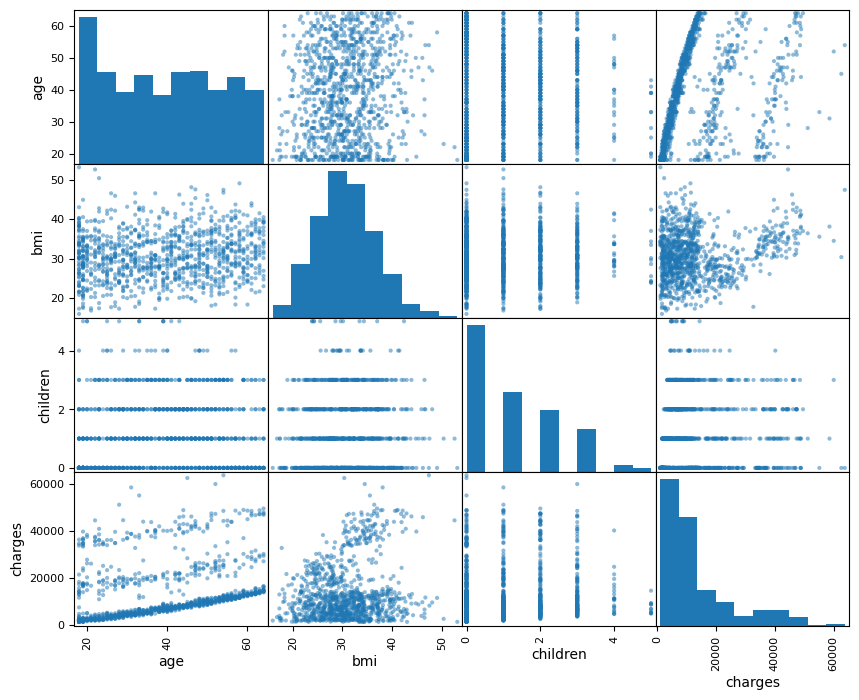

In [ ]:
from pandas.plotting import scatter_matrix
attribtes = ["age", "bmi",
"children","charges"]
scatter_matrix(insurance_train[attribtes], figsize=( 10, 8))
plt.show()


**Experiment with Attribute Combinations**

Generate new features in the training set to enhance predictive modeling:

*  Create interaction features between numeric and categorical
variables (e.g., age_bmi, smoker_bmi).

*  Applie non-linear transformations (square, square root, logarithm) to numeric features.

*  Compute ratios and proportions to capture relative relationships.

*  Combine features with categorical variables to create target-relevant interactions.


In [ ]:
import pandas as pd
import numpy as np

# -------------------------
#  Simple transformations and interactions
# -------------------------
insurance_train["age_bmi"] = insurance_train["age"] * insurance_train["bmi"]
insurance_train["children_bmi"] = (insurance_train["children"] + 1) * insurance_train["bmi"]
insurance_train["smoker_bmi"] = insurance_train["bmi"] * insurance_train["smoker"].map({"yes":1, "no":0})
insurance_train["age_smoker"] = insurance_train["age"] * insurance_train["smoker"].map({"yes":1, "no":0})


# -------------------------
#  Nonlinear transformations
# -------------------------
insurance_train["sqrt_bmi"] = np.sqrt(insurance_train["bmi"])
insurance_train["sqrt_age"] = np.sqrt(insurance_train["age"])
insurance_train["bmi_squared"] = insurance_train["bmi"] ** 2
insurance_train["age_squared"] = insurance_train["age"] ** 2
insurance_train["log_bmi"] = np.log1p(insurance_train["bmi"])
insurance_train["log_age"] = np.log1p(insurance_train["age"])
insurance_train["log_children"] = np.log1p(insurance_train["children"])

# -------------------------
#  Ratios and proportions
# -------------------------
insurance_train["bmi_per_age"] = insurance_train["bmi"] / (insurance_train["age"] + 1)
insurance_train["age_per_children"] = insurance_train["age"] / (insurance_train["children"] + 1)
insurance_train["children_per_age"] = insurance_train["children"] / (insurance_train["age"] + 1)

# -------------------------
#  Interactions with categorical variables
# -------------------------
insurance_train["bmi_female"] = insurance_train["bmi"] * insurance_train["sex"].map({"female":1, "male":0})
insurance_train["bmi_male"] = insurance_train["bmi"] * insurance_train["sex"].map({"female":0, "male":1})


# -------------------------
#  Multiple handsets
# -------------------------
insurance_train["children_bmi_smoker"] = (insurance_train["children"] + 1) * insurance_train["bmi"] * insurance_train["smoker"].map({"yes":1, "no":0})

# -------------------------

Recalculate and display the correlation of all numeric features—including newly created ones—with the target charges, helping identify which features are most strongly related after feature engineering.

In [ ]:
numeric_cols = insurance_train.select_dtypes(include='number')
corr_matrix = numeric_cols.corr()
corr_matrix = corr_matrix["charges"].drop("charges")  #  we remove the load correlation with itself
print(corr_matrix.sort_values(ascending=False))

smoker_bmi             0.841228
age_smoker             0.786787
children_bmi_smoker    0.742491
age_bmi                0.323482
age_squared            0.292655
age                    0.291370
sqrt_age               0.288164
log_age                0.283473
log_bmi                0.187477
sqrt_bmi               0.187042
bmi                    0.185565
bmi_squared            0.179584
children_bmi           0.117482
age_per_children       0.114197
bmi_male               0.086029
log_children           0.074874
children               0.061811
children_per_age      -0.009929
bmi_female            -0.016849
bmi_per_age           -0.160366
Name: charges, dtype: float64


Select and keep important original columns and specific engineered features (**smoker_bmi, age_smoker**) to create a new, focused training dataset.

In [ ]:
# Significant original columns
original_cols = ["age", "bmi", "children", "smoker", "sex", "region","charges"]

# Add the two combined features
selected_cols = original_cols + ["smoker_bmi", "age_smoker"]

# New DataFrame with only the selected columns
insurance_train_selected = insurance_train[selected_cols]


**6. **Prepare** the Data for Machine Learning Algorithms**

Display the first few rows of the selected training dataset to inspect the retained original and engineered features.

In [ ]:
insurance_train_selected.head()

,age,bmi,children,smoker,sex,region,charges,smoker_bmi,age_smoker
294,25,26.800,3,no,male,southwest,3906.12700,0.0,0
179,41,33.155,3,no,female,northeast,8538.28845,0.0,0
1335,18,36.850,0,no,female,southeast,1629.83350,0.0,0
634,51,39.700,1,no,male,southwest,9391.34600,0.0,0
67,40,26.315,1,no,male,northwest,6389.37785,0.0,0


Create a copy of the selected training dataset to safely perform further analysis or preprocessing without modifying the original.

In [ ]:
insurance1 = insurance_train_selected.copy()

**Clean the Data**

Separate the dataset into predictors (X) and target (y) .

In [ ]:
# X = features / predictors
X = insurance1.drop("charges", axis=1)
# y = target
y = insurance1["charges"].copy()

Check and display the number of missing values in each feature column of the predictors dataset.

In [ ]:
# Check the columns with missing values
print(X.isnull().sum())


age           0
bmi           0
children      0
smoker        0
sex           0
region        0
smoker_bmi    0
age_smoker    0
dtype: int64


Impute missing values in the dataset:

*   For numeric columns, replace missing values with the median.
*   For categorical columns, replace missing values with the most frequent value.

Return clean numeric and categorical DataFrames for further processing.

In [ ]:
from sklearn.impute import SimpleImputer

# Separate numerical and categorical columns
X_num = X.select_dtypes(include=[np.number])
X_cat = X.select_dtypes(include=["object", "category"])

# Imputer for numerical features (median)
num_imputer = SimpleImputer(strategy="median")
X_num_imputed = pd.DataFrame(
    num_imputer.fit_transform(X_num),
    columns=X_num.columns,
    index=X.index
)

# Imputer for categorical features (most frequent)
cat_imputer = SimpleImputer(strategy="most_frequent")
X_cat_imputed = pd.DataFrame(
    cat_imputer.fit_transform(X_cat),
    columns=X_cat.columns,
    index=X.index
)


In [ ]:
X_num_imputed.head()

,age,bmi,children,smoker_bmi,age_smoker
294,25.0,26.800,3.0,0.0,0.0
179,41.0,33.155,3.0,0.0,0.0
1335,18.0,36.850,0.0,0.0,0.0
634,51.0,39.700,1.0,0.0,0.0
67,40.0,26.315,1.0,0.0,0.0


In [ ]:
X_cat_imputed.head()

,smoker,sex,region
294,no,male,southwest
179,no,female,northeast
1335,no,female,southeast
634,no,male,southwest
67,no,male,northwest


**Handling Text and Categorical Attributes**

Encode categorical features using one-hot encoding, converting each category into binary columns while ignoring unknown categories.

In [ ]:

from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(
    handle_unknown="ignore",
    sparse_output=False
)

X_cat_encoded_array = cat_encoder.fit_transform(X_cat_imputed)


Convert the one-hot encoded array of categorical features into a Pandas DataFrame with appropriate column names and the original index.

In [ ]:
X_cat_encoded = pd.DataFrame(
    X_cat_encoded_array,
    columns=cat_encoder.get_feature_names_out(X_cat.columns),
    index=X.index
)

Combine the imputed numeric features and one-hot encoded categorical features into a single DataFrame .

In [ ]:
X = pd.concat([X_num_imputed, X_cat_encoded], axis=1)

Display the first few rows of the fully processed predictors dataset to inspect numeric and encoded categorical features.

In [ ]:
X.head()

,age,bmi,children,smoker_bmi,age_smoker,smoker_no,smoker_yes,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest
294,25.0,26.800,3.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
179,41.0,33.155,3.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,18.0,36.850,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
634,51.0,39.700,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
67,40.0,26.315,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


**Feature Scaling and Transformation**

Identify numeric and categorical columns in the processed dataset in preparation for feature scaling, separating already encoded categorical features from numeric ones.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Numeric columns
X_num = X.select_dtypes(include=[np.number])

# Categorical columns (already encoded as 0/1)
X_cat = X.select_dtypes(exclude=[np.number])


Scale numeric features using standardization (mean = 0, standard deviation = 1) and convert the result back to a Pandas DataFrame for consistency.

In [ ]:
scaler = StandardScaler()

X_num_scaled = scaler.fit_transform(X_num)

# Return to DataFrame
X_num_scaled = pd.DataFrame(
    X_num_scaled,
    columns=X_num.columns,
    index=X.index
)

Combine the scaled numeric features with the encoded categorical features to form the final processed dataset .

In [ ]:
X = pd.concat([X_num_scaled, X_cat], axis=1)

In [ ]:
X.head()

,age,bmi,children,smoker_bmi,age_smoker,smoker_no,smoker_yes,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest
294,-1.007157,-0.656649,1.565207,-0.494944,-0.469746,0.507291,-0.507291,-0.983317,0.983317,-0.569436,-0.566558,-0.611192,1.778602
179,0.133146,0.394937,1.565207,-0.494944,-0.469746,0.507291,-0.507291,1.016966,-1.016966,1.756123,-0.566558,-0.611192,-0.562239
1335,-1.506040,1.006363,-0.914712,-0.494944,-0.469746,0.507291,-0.507291,1.016966,-1.016966,-0.569436,-0.566558,1.636147,-0.562239
634,0.845836,1.477964,-0.088072,-0.494944,-0.469746,0.507291,-0.507291,-0.983317,0.983317,-0.569436,-0.566558,-0.611192,1.778602
67,0.061877,-0.736904,-0.088072,-0.494944,-0.469746,0.507291,-0.507291,-0.983317,0.983317,-0.569436,1.765045,-0.611192,-0.562239


**Custom Transformers**

Define a custom transformer to add new features (smoker_bmi and age_smoker) by creating interactions between existing columns, usable in a scikit-learn pipeline.

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class AddFeaturesTransformer(BaseEstimator, TransformerMixin):
    """
    Custom transformer pour ajouter les features 'smoker_bmi' et 'age_smoker'
    """
    def __init__(self):
        # no hyperparameter here
        pass

    def fit(self, X, y=None):
        # nothing to learn, so we return self
        return self

    def transform(self, X):
        # we copy so as not to modify X directly
        X_transformed = X.copy()
        # creation of new features
        X_transformed["smoker_bmi"] = X_transformed["bmi"] * X_transformed["smoker"].map({"yes": 1, "no": 0})
        X_transformed["age_smoker"] = X_transformed["age"] * X_transformed["smoker"].map({"yes": 1, "no": 0})
        return X_transformed
    def get_feature_names_out(self, input_features=None):
        if input_features is None:
           return ["smoker_bmi", "age_smoker"]
        return list(input_features) + ["smoker_bmi", "age_smoker"]


**Transformation Pipelines**

Create a copy of the original (unprocessed) training dataset and separate it into predictors (X1) and target (y1) to test the automation of the preprocessing pipeline without manually added features.

In [ ]:
insurance_train1 = strat_train_set.copy()

# Separate X1 (features) et y (target)
X1 = insurance_train1.drop("charges", axis=1)
y1 = insurance_train1["charges"].copy()

Build and apply a full preprocessing pipeline to automate feature engineering and data cleaning:

- Add new features (`smoker_bmi` and `age_smoker`) using a custom transformer.  
- Impute missing values and scale numeric features.  
- Impute missing values and one-hot encode categorical features.  
- Combine all transformations into a single DataFrame .

In [ ]:
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import Pipeline

# Pipeline for numerical variables: imputation + standardization
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Pipeline for categorical variables: imputation + one-hot encoding
cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Global pipeline with make_column_transformer and make_column_selector

preprocessing = Pipeline([
    ("add_features", AddFeaturesTransformer()),
    ("column_transformer", make_column_transformer(
        (num_pipeline, make_column_selector(dtype_include="number")),
        (cat_pipeline, make_column_selector(dtype_include=object))
    ))
])

# Apply the pipeline to the dataset (X = features)
X_prepared = preprocessing.fit_transform(X1)

# Retrieve the encoded column names if needed
feature_names = preprocessing.named_steps["column_transformer"].get_feature_names_out()
X_prepared_df = pd.DataFrame(X_prepared, columns=feature_names, index=X1.index)

# Verification
print(X_prepared_df.head())


      pipeline-1__age  pipeline-1__bmi  pipeline-1__children  \
294         -1.007157        -0.656649              1.565207   
179          0.133146         0.394937              1.565207   
1335        -1.506040         1.006363             -0.914712   
634          0.845836         1.477964             -0.088072   
67           0.061877        -0.736904             -0.088072   

      pipeline-1__smoker_bmi  pipeline-1__age_smoker  pipeline-2__sex_female  \
294                -0.494944               -0.469746                     0.0   
179                -0.494944               -0.469746                     1.0   
1335               -0.494944               -0.469746                     1.0   
634                -0.494944               -0.469746                     0.0   
67                 -0.494944               -0.469746                     0.0   

      pipeline-2__sex_male  pipeline-2__smoker_no  pipeline-2__smoker_yes  \
294                    1.0                    1.0        

**6. Select and Train a Model**

**Train and Evaluate on the Training Set**

Build and train a complete pipeline combining preprocessing and a linear regression model:

- Fit the pipeline on the training dataset (`X1` as features, `y1` as target).  
- Make predictions on the training set.  
- Display the first few predicted vs actual values.  
- Calculate the **Root Mean Squared Error (RMSE)** to evaluate model performance on the training data.

In [ ]:
# Importing libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline

# Create a complete pipeline with preprocessing + model
lin_reg_pipeline = make_pipeline(
    preprocessing,
    LinearRegression()
)

# Train the model on the training set
lin_reg_pipeline.fit(X1, y1)

# Making predictions on the training set
y_pred = lin_reg_pipeline.predict(X1)

# Display the first 5 predictions vs actual values
print(pd.DataFrame({"Actual": y1, "Predicted": y_pred}).head())

# Calculate the RMSE on the training set
rmse = np.sqrt(mean_squared_error(y, y_pred))
print("RMSE sur l'ensemble d'entraînement :", rmse)

          Actual     Predicted
294   3906.12700   4827.526255
179   8538.28845  11030.485636
1335  1629.83350   2125.540681
634   9391.34600  10706.365807
67    6389.37785   8393.586809
RMSE sur l'ensemble d'entraînement : 4886.094847182928


Visualize the distribution of the target variable `y` (`charges`):

- Plot a histogram of the original `y` to observe its distribution.  
- Plot a histogram of the log-transformed `y` to reduce skewness and better visualize variations.  
- Use side-by-side plots for easy comparison.

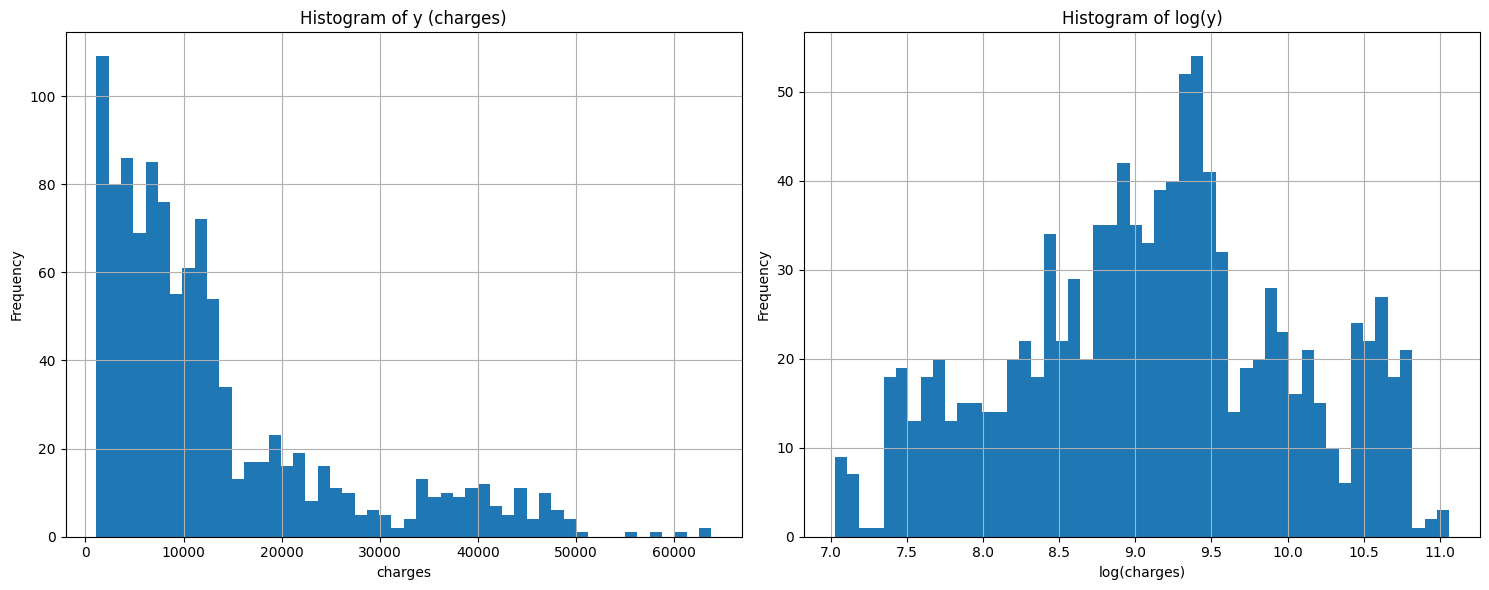

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15, 6))

# Histogram of y
plt.subplot(1, 2, 1)
y1.hist(bins=50)
plt.title("Histogram of y (charges)")
plt.xlabel("charges")
plt.ylabel("Frequency")

# Histogram of log(y)
plt.subplot(1, 2, 2)
np.log(y1).hist(bins=50)
plt.title("Histogram of log(y)")
plt.xlabel("log(charges)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


**Observation**  

By comparing the histograms of `y` and `log(y)`, we can observe that:

- The original `y` (charges) is highly right-skewed.  
- The log-transformed `y` shows reduced skewness and a distribution that is closer to normal.  

**Conclusion:** It is recommended to **apply a log transformation** to the target variable before modeling to improve model performance.


Train a linear regression model with a **log-transformed target variable**:

- Apply a logarithmic transformation to the target (`charges`) using `TransformedTargetRegressor` to handle skewness.  
- Combine preprocessing steps and linear regression into a single pipeline.  
- Train the model on the training dataset.  
- Generate predictions and automatically apply the inverse transformation to return to the original scale.  
- Compare predicted and actual values and compute the **RMSE** to evaluate model performance.

In [ ]:
# Importing libraries
from sklearn.compose import TransformedTargetRegressor

# Linear regression with logarithmic transformation of the target
model = TransformedTargetRegressor(
    regressor=make_pipeline(preprocessing, LinearRegression()),
    func=np.log,       # transformation applied to the target
    inverse_func=np.exp # inverse transformation for predictions
)

# Training
model.fit(X1, y1)

# Making predictions on the training set
y_pred = model.predict(X1)

# Display the first 5 predictions vs actual values
print(pd.DataFrame({"Actual": y1, "Predicted": y_pred}).head())

# Calculate the RMSE on the training set
rmse = np.sqrt(mean_squared_error(y, y_pred))
print("RMSE sur l'ensemble d'entraînement :", rmse)

          Actual    Predicted
294   3906.12700  3969.162625
179   8538.28845  9968.666482
1335  1629.83350  2394.325355
634   9391.34600  9433.643360
67    6389.37785  6516.038493
RMSE sur l'ensemble d'entraînement : 5553.30491863815


**Observation**  

- The RMSE calculated with the **log-transformed target** is slightly higher compared to the model without transformation.  
- However, by inspecting the first few predicted vs actual values, we notice that the predictions are **closer to the true values** than without transformation.  
- This shows that the **target transformation improves prediction accuracy for individual observations**, even if the overall RMSE appears slightly higher.


Train and evaluate a **Decision Tree Regressor** using the existing preprocessing pipeline:

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = make_pipeline(
    preprocessing,
    DecisionTreeRegressor(random_state=42)
)

model.fit(X1, y1)

y_pred = model.predict(X1)

print(pd.DataFrame({"Actual": y1, "Predicted": y_pred}).head())

rmse = np.sqrt(mean_squared_error(y, y_pred))
print("RMSE sur l'ensemble d'entraînement :", rmse)

          Actual   Predicted
294   3906.12700  3906.12700
179   8538.28845  8538.28845
1335  1629.83350  1629.83350
634   9391.34600  9391.34600
67    6389.37785  6389.37785
RMSE sur l'ensemble d'entraînement : 494.20598375812835


Train and evaluate a **Decision Tree Regressor** with a **log-transformed target variable**:

In [ ]:
model = TransformedTargetRegressor(
    regressor=make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42)),
    func=np.log,
    inverse_func=np.exp
)

model.fit(X1, y1)

y_pred = model.predict(X1)

import pandas as pd
print(pd.DataFrame({"Actual": y1, "Predicted": y_pred}).head())

rmse = np.sqrt(mean_squared_error(y, y_pred))
print("RMSE sur l'ensemble d'entraînement :", rmse)

          Actual   Predicted
294   3906.12700  3906.12700
179   8538.28845  8538.28845
1335  1629.83350  1629.83350
634   9391.34600  9391.34600
67    6389.37785  6389.37785
RMSE sur l'ensemble d'entraînement : 554.2077337612818


**Observation**  

The Decision Tree model shows slightly better performance on the training set compared to other models.  
However, this improvement may indicate **overfitting**, as decision trees tend to fit the training data very closely.

**Conclusion:** To reduce overfitting and improve generalization, we decide to test a **Random Forest** model.

Train and evaluate a **Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = make_pipeline(
    preprocessing,
    RandomForestRegressor(random_state=42)
)

model.fit(X1, y1)

y_pred = model.predict(X1)

print(pd.DataFrame({"Actual": y1, "Predicted": y_pred}).head())

rmse = np.sqrt(mean_squared_error(y, y_pred))
print("RMSE sur l'ensemble d'entraînement :", rmse)

          Actual    Predicted
294   3906.12700  4424.293082
179   8538.28845  8230.552801
1335  1629.83350  2144.756832
634   9391.34600  9244.814478
67    6389.37785  6398.470800
RMSE sur l'ensemble d'entraînement : 1874.5021730343276


Train and evaluate a **Random Forest Regressor** with a **log-transformed target variable**

In [ ]:
model = TransformedTargetRegressor(
    regressor=make_pipeline(preprocessing, RandomForestRegressor(random_state=42)),
    func=np.log,
    inverse_func=np.exp
)

model.fit(X1, y1)

y_pred = model.predict(X1)

import pandas as pd
print(pd.DataFrame({"Actual": y1, "Predicted": y_pred}).head())

rmse = np.sqrt(mean_squared_error(y, y_pred))
print("RMSE sur l'ensemble d'entraînement :", rmse)

          Actual    Predicted
294   3906.12700  4108.013864
179   8538.28845  8389.873115
1335  1629.83350  1873.581782
634   9391.34600  9254.089993
67    6389.37785  6449.997514
RMSE sur l'ensemble d'entraînement : 2385.7881835430017


**Better Evaluation Using Cross-Validation**

Evaluate the Decision Tree model using **10-fold cross-validation**:

- Apply a logarithmic transformation to the target variable to handle skewness.  
- Perform cross-validation to obtain a more reliable estimate of model performance.  
- Compute the **RMSE** for each fold.  
- Display summary statistics (mean, standard deviation, min, max) of the cross-validation results.

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Pipeline with TransformedTargetRegressor for skewed target
tree_model = TransformedTargetRegressor(
    regressor=make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42)),
    func=np.log,
    inverse_func=np.exp
)

# 10-fold cross-validation
tree_rmses = -cross_val_score(
    tree_model, X1, y1,
    scoring="neg_root_mean_squared_error",
    cv=10
)

# Performance Summary
print(pd.Series(tree_rmses).describe())


count      10.000000
mean     6542.909389
std      1011.057217
min      5318.661292
25%      5831.673093
50%      6297.978722
75%      7168.539076
max      8523.862706
dtype: float64


**Observation**  

Cross-validation results indicate that the **Decision Tree model overfits**:

- The model performs very well on the training data but shows high variance across folds.  
- This suggests poor generalization to unseen data.  
- Overfitting is a common issue with decision trees, motivating the use of **Random Forest** to improve stability and performance.


Evaluate the Random Forest model using **10-fold cross-validation**:

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_model = TransformedTargetRegressor(
    regressor=make_pipeline(preprocessing, RandomForestRegressor(random_state=42)),
    func=np.log,
    inverse_func=np.exp
)

forest_rmses = -cross_val_score(
    forest_model, X1, y1,
    scoring="neg_root_mean_squared_error",
    cv=10
)

print(pd.Series(forest_rmses).describe())


count      10.000000
mean     4640.176340
std       745.731556
min      3692.838183
25%      4106.914284
50%      4320.433832
75%      5235.168723
max      5805.796882
dtype: float64


**Observation**  

Cross-validation results for the Random Forest model show that:

- The **mean RMSE across folds** is higher than the training RMSE from the already fitted Random Forest.  
- This indicates that the training RMSE is **optimistic** and highlights the importance of cross-validation to assess generalization.  
- Random Forest reduces overfitting compared to a single Decision Tree, but cross-validation gives a more realistic estimate of performance.


Define the final **pipeline with Random Forest** as the chosen model:

- Apply the preprocessing pipeline to handle features automatically.  
- Use **Random Forest Regressor** as the main predictive model.  
- Apply a **log transformation** to the target to reduce skewness and improve performance.  
- Use the inverse transformation to return predictions to the original scale.

In [ ]:
full_pipeline = TransformedTargetRegressor(
    regressor=make_pipeline(preprocessing, RandomForestRegressor()),
    func=np.log,
    inverse_func=np.exp
)

**7. Fine-Tune Your Model**

**Grid Search**

Perform **hyperparameter tuning** for the Random Forest model using **Grid Search with cross-validation**:

- Define a grid of Random Forest hyperparameters to explore.  
- Use cross-validation to evaluate each configuration with **RMSE** as the metric.  
- Identify the best hyperparameters and the corresponding performance.  
- Select the best model for final use.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid to test
param_grid = {
    'regressor__randomforestregressor__n_estimators': [100, 200],
    'regressor__randomforestregressor__max_depth': [None, 10, 20],
    'regressor__randomforestregressor__max_features': ['sqrt', 'log2']
}


# Grid Search with cross-validation
grid_search = GridSearchCV(
    full_pipeline,
    param_grid,
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1,
    verbose=2
)

# Training
grid_search.fit(X1, y1)

# Best hyperparameters
print("Best parameters:", grid_search.best_params_)

# Best RMSE (cross-validation)
best_rmse = -grid_search.best_score_
print("Best RMSE:", best_rmse)

# Best final model
best_model = grid_search.best_estimator_


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters: {'regressor__randomforestregressor__max_depth': None, 'regressor__randomforestregressor__max_features': 'sqrt', 'regressor__randomforestregressor__n_estimators': 200}
Best RMSE: 4679.520257090832


**Randomized Search**

Perform **Randomized Search** for hyperparameter tuning of the Random Forest model:

- Define a distribution of hyperparameters to explore.  
- Test 50 random combinations using **5-fold cross-validation**.  
- Evaluate each combination using **RMSE**.  
- Identify the best hyperparameters and the corresponding RMSE for improved model performance

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from scipy.stats import randint


param_distributions = {
    "regressor__randomforestregressor__n_estimators": randint(50, 300),
    "regressor__randomforestregressor__max_depth": [None, 5, 10, 20, 30],
    "regressor__randomforestregressor__max_features": ["sqrt", "log2"],
    "regressor__randomforestregressor__min_samples_split": randint(2, 20),
    "regressor__randomforestregressor__min_samples_leaf": randint(1, 10)
}

# Randomized Search
rnd_search = RandomizedSearchCV(
    full_pipeline,
    param_distributions=param_distributions,
    n_iter=50,                    # number of combinations tested
    cv=5,
    scoring="neg_root_mean_squared_error",
    random_state=42,
    n_jobs=-1
)

# Training
rnd_search.fit(X1, y1)

# Results
print("Best parameters:", rnd_search.best_params_)
print("Best RMSE:", -rnd_search.best_score_)


Best parameters: {'regressor__randomforestregressor__max_depth': 10, 'regressor__randomforestregressor__max_features': 'log2', 'regressor__randomforestregressor__min_samples_leaf': 1, 'regressor__randomforestregressor__min_samples_split': 5, 'regressor__randomforestregressor__n_estimators': 99}
Best RMSE: 4697.197617210181


**Explanation / Reasoning**  

Use **Randomized Search** instead of Grid Search to:

- **Reduce computation time** by testing a limited number of random hyperparameter combinations instead of all possible combinations.  
- **Explore continuous or wide ranges** of hyperparameters more efficiently.  
- Obtain good hyperparameter estimates without exhaustively searching the entire grid.


**Analyzing the Best Models and Their Errors**

Extract the **best trained model** (regressor pipeline) from the `RandomizedSearchCV` results for further evaluation or predictions.

In [ ]:
pipeline = rnd_search.best_estimator_.regressor_

Display the **steps of the selected pipeline**, showing each transformation and the final regressor in the best model.

In [ ]:
pipeline.named_steps


{'pipeline': Pipeline(steps=[('add_features', AddFeaturesTransformer()),
                 ('column_transformer',
                  ColumnTransformer(transformers=[('pipeline-1',
                                                   Pipeline(steps=[('imputer',
                                                                    SimpleImputer(strategy='median')),
                                                                   ('scaler',
                                                                    StandardScaler())]),
                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7ebc7f453a70>),
                                                  ('pipeline-2',
                                                   Pipeline(steps=[('imputer',
                                                                    SimpleImputer(strategy='most_frequent')),
                                                                   ('onehot',
    

Analyze the **feature importances** from the trained Random Forest model:

- Access the trained pipeline inside the `TransformedTargetRegressor`.  
- Extract feature importances from the Random Forest regressor.  
- Retrieve the corresponding feature names after preprocessing.  
- Create a DataFrame to display and sort features by importance, highlighting the most influential ones.

In [ ]:

# Access the trained pipeline inside the TransformedTargetRegressor
pipeline = best_model.regressor_

# RandomForest feature importances
feature_importances = pipeline.named_steps["randomforestregressor"].feature_importances_

# Feature names after preprocessing
feature_names = pipeline.named_steps["pipeline"].named_steps["column_transformer"].get_feature_names_out()

# Create a DataFrame and sort
importance_df = pd.DataFrame({
    "feature": feature_names,
    "importance": feature_importances
}).sort_values(by="importance", ascending=False)

print(importance_df.head(20))

                         feature  importance
0                pipeline-1__age    0.348975
8         pipeline-2__smoker_yes    0.133486
3         pipeline-1__smoker_bmi    0.130914
1                pipeline-1__bmi    0.115241
7          pipeline-2__smoker_no    0.100544
4         pipeline-1__age_smoker    0.094760
2           pipeline-1__children    0.044218
9   pipeline-2__region_northeast    0.007014
5         pipeline-2__sex_female    0.005578
11  pipeline-2__region_southeast    0.005577
6           pipeline-2__sex_male    0.004872
12  pipeline-2__region_southwest    0.004582
10  pipeline-2__region_northwest    0.004238


**Evaluate Your System on the Test Set**

Evaluate the best trained model on the **test set**:

- Copy the test dataset to avoid modifying the original.  
- Separate features (`X_test`) and target (`y_test`).  
- Generate predictions using the best trained pipeline.  
- Compute the **RMSE** to assess model performance on unseen data.

In [ ]:
# Copy the test set
insurance_test = strat_test_set.copy()

#Separate X_test and y_test
X_test = insurance_test.drop("charges", axis=1)
y_test = insurance_test["charges"].copy()

# Make the prediction with the trained pipeline
y_pred_test = best_model.predict(X_test)


rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("RMSE sur le test set :", rmse_test)


RMSE sur le test set : 4361.016653583609


Compute a **95% confidence interval** for the RMSE on the test set:

- Calculate the squared errors between predicted and actual values.  
- Use the **t-distribution** to estimate the confidence interval.  
- Report the lower and upper bounds of the RMSE at 95% confidence, providing an uncertainty measure of model performance.

In [ ]:
import numpy as np
from scipy import stats

# y_pred_test = final_model.predict(X_test)
# y_test = test set charges

# Calculate the squared errors
squared_errors = (y_pred_test - y_test) ** 2

# 95% confidence interval
confidence = 0.95
ci_lower, ci_upper = np.sqrt(stats.t.interval(
    confidence,
    len(squared_errors) - 1,          # degrees of freedom = n-1
    loc=squared_errors.mean(),        # mean squared error
    scale=stats.sem(squared_errors)   # mean standard deviation of errors
))

print(f"Intervalle de confiance 95% pour le RMSE : [{ci_lower:.2f}, {ci_upper:.2f}]")


Intervalle de confiance 95% pour le RMSE : [3307.73, 5205.37]


Compute the **Mean Absolute Error (MAE)** on the test set to provide an additional evaluation metric that measures the average absolute difference between predicted and actual values.

In [ ]:
from sklearn.metrics import mean_absolute_error

mae_test = mean_absolute_error(y_test, y_pred_test)
print("MAE on  test set :", mae_test)


MAE on  test set : 2088.8313134121727


Compute the **R² score** on the test set to measure how well the model explains the variance in the target variable.

In [ ]:
from sklearn.metrics import r2_score

r2_test = r2_score(y_test, y_pred_test)
print("R² on test set :", r2_test)


R² on test set : 0.871090132710456


Compute the **Root Mean Squared Logarithmic Error (RMSLE)** on the test set to evaluate model performance while reducing the impact of large target values.

In [ ]:
from sklearn.metrics import mean_squared_log_error
import numpy as np

rmsle_test = np.sqrt(mean_squared_log_error(y_test, y_pred_test))
print("RMSLE on test set :", rmsle_test)


RMSLE on test set : 0.3842235047846971


**Interpretation of RMSLE**  

- An RMSLE of **0.38** indicates that the Random Forest model predicts insurance charges reasonably well: predicted values are close to the true values on a logarithmic scale.  
- Since the charges are **highly skewed** (many small values and a few very large ones), RMSLE is more suitable than standard RMSE.  
- A value of 0.38 suggests a **moderate average relative error in log scale**, showing that the model captures the general trend effectively.


Visualize model performance by plotting **predicted values versus true values** on the test set.  
The diagonal line represents perfect predictions, making it easier to identify under- or over-estimation.

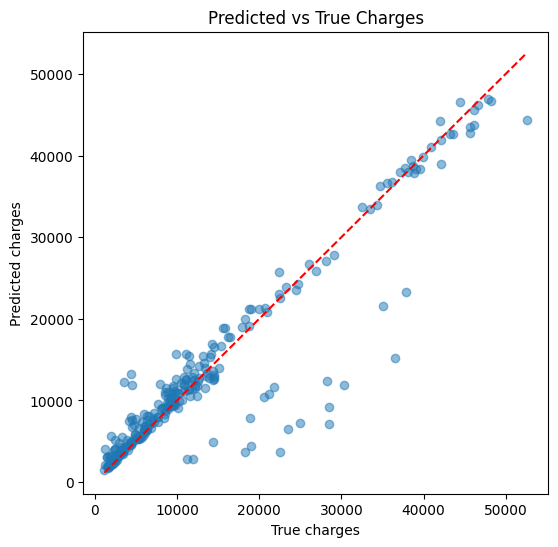

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], "r--")
plt.xlabel("True charges")
plt.ylabel("Predicted charges")
plt.title("Predicted vs True Charges")
plt.show()


**Interpretation of Predicted vs True Charges Scatter Plot**  

- The scatter plot shows predicted insurance charges versus the true charges.  
- Most points are clustered around the **diagonal red line**, indicating that the model predicts well for the majority of cases.  
- Some points **below or above the line** correspond to underestimation or overestimation, particularly for **very high charges**, which are harder to predict accurately.  
- Overall, the model captures the **general trend** and predicts small to moderate charges more accurately than extreme values.


Analyze model errors by plotting the **distribution of residuals** on the test set.  
This visualization helps assess whether errors are centered around zero and approximately normally distributed.


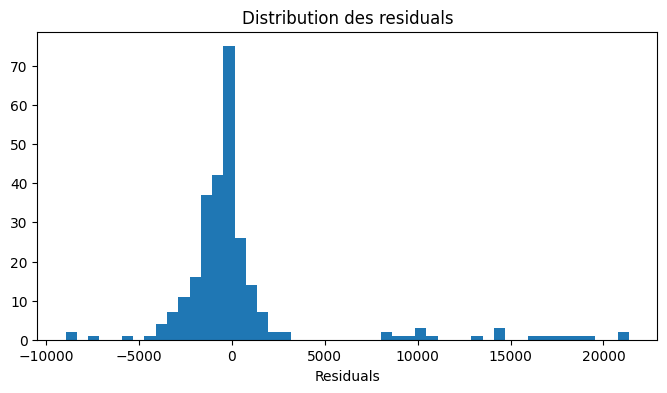

In [ ]:
residuals = y_test - y_pred_test

plt.figure(figsize=(8,4))
plt.hist(residuals, bins=50)
plt.xlabel("Residuals")
plt.title("Distribution des residuals")
plt.show()


**8. Launch, Monitor, and Maintain Your System**

Save the trained **best model** to a file using `joblib`:

- Export the model as `insurance_random_forest_model.pkl`.  
- This allows reusing the trained model later without retraining.

In [ ]:
import joblib

joblib.dump(best_model, "insurance_random_forest_model.pkl")


['insurance_random_forest_model.pkl']


Load the previously saved **Random Forest model** and make predictions for new data:

- Use `joblib.load` to restore the trained model.  
- Prepare new input data (example: first row of `X_test`).  
- Generate and display predicted insurance charges.


In [ ]:
import joblib


final_model = joblib.load("insurance_random_forest_model.pkl")

# Exemple
new_client = X_test.iloc[:1]

prediction = final_model.predict(new_client)
print("Predicted charges:", prediction)


Predicted charges: [6621.61740048]


**General Conclusion**  

- The **Random Forest model** was chosen as the main predictive model due to its ability to reduce overfitting compared to a single Decision Tree and handle complex feature interactions.  
- **Preprocessing and feature engineering** (imputation, scaling, one-hot encoding, and feature interactions) improved the model's ability to capture patterns in the data.  
- Transforming the target with a **log function** helped reduce skewness, leading to more accurate predictions for most clients.  
- Cross-validation confirmed that the Decision Tree overfits, while Random Forest provides better generalization.  
- Evaluation metrics on the test set (RMSE, MAE, R², RMSLE) and visualizations (predicted vs true charges, residuals) indicate that the model predicts insurance charges reasonably well, especially for small to moderate values.  
- Future improvements could include testing **other models** (Gradient Boosting, XGBoost, SVR) and further **hyperparameter tuning** to enhance predictive performance.
